In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#funzione che prende i file excel, li controlla e aggiunge i nuovi record al database grosso, poi sposta i fiel

In [3]:
dir="../data/lista_completa_13102023.xlsx"

In [28]:
import datetime


def process_data(file_path, source, name, save):
    """
    Questa funzione processa un file di dati Excel e restituisce un DataFrame pandas.

    Parametri:
    - file_path (str): Il percorso del file Excel da processare.
    - source (str): La fonte dei dati.
    - name (str): Il nome della banca.

    Ritorna:
    - df (DataFrame): Il DataFrame processato.

    La funzione esegue le seguenti operazioni solo se source è "bank" e name è "san_paolo":
    1. Carica il file Excel in un DataFrame pandas.
    2. Rimuove le prime righe fino alla prima cella non vuota nella prima colonna.
    3. Imposta la prima riga come nuova intestazione del DataFrame.
    4. Rimuove la prima riga dal DataFrame.
    5. Rinomina gli indici del DataFrame con i valori della nuova intestazione.
    6. Resetta gli indici del DataFrame.
    7. Converte la colonna "Data" in formato datetime.
    8. Rinomina la colonna 'Categoria' in 'Categoria banca'.
    9. Aggiunge le nuove colonne 'Categoria', 'Subcategoria' e 'Commento', inizialmente impostate su None.
    """

    if source == "bank" and name == "san_paolo":
        df = pd.read_excel(file_path)

        # Rimuovi le prime righe fino alla prima cella vuota nella prima colonna
        df = df[df.iloc[:, 0].notna()]

        # Imposta la prima riga come nuova intestazione
        new_header = df.iloc[0]

        # Rimuovi la prima riga dal DataFrame
        df = df[1:]

        # Rinomina gli indici del DataFrame con i valori della nuova intestazione
        df = df.rename(columns=new_header)

        # Resetta gli indici del DataFrame
        df = df.reset_index(drop=True)

        # Rinomina le colonne
        df = df.rename(
            columns={
                "Data": "Date",
                "Categoria ": "Bank Category",
                "Operazione": "Operation",
                "Dettagli": "Details",
                "Conto o carta": "Account or Card",
                "Contabilizzazione": "Accounting",
                "Valuta ": "Valute",
                "Importo": "Import",
            }
        )

        # Converte la colonna "Data" in formato datetime
        df["Date"] = pd.to_datetime(df["Date"])

        # Aggiungi le nuove colonne 'Categoria', 'Subcategoria' e 'Commento'
        df[["Category", "Subcategory", "Comment"]] = None, None, None

        # Converti le colonne 'Categoria', 'Subcategoria' e 'Commento' in formato stringa
        df[["Category", "Subcategory", "Comment"]] = df[
            ["Category", "Subcategory", "Comment"]
        ].astype("str")
        if save == True:
            today = datetime.datetime.now()
            df.to_csv(
                f'C:/Users/Admin/Documents/GitHub/Banca/data/dataframe_{today.strftime("%Y%m%d_%H%M%S")}.csv',
                index=False,
            )
        else:
            return df

In [29]:
process_data(dir, "bank", "san_paolo", save=True)

In [4]:
df = pd.read_excel(dir)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Rimuovi le prime righe fino alla prima cella vuota nella prima colonna
df = df[df.iloc[:, 0].notna()]
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
17,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria,Valuta,Importo
18,2023-10-13 00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49
19,2023-10-13 00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92
20,2023-10-12 00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77
21,2023-10-12 00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99
...,...,...,...,...,...,...,...,...
117,2022-12-07 00:00:00,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.4
118,2022-12-01 00:00:00,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42
119,2022-11-12 00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99
120,2022-11-05 00:00:00,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14


In [31]:
# Imposta la prima riga come nuova intestazione
new_header = df.iloc[0]

# Rimuovi la prima riga dal DataFrame
df = df[1:]

# Rinomina gli indici del DataFrame con i valori della nuova intestazione
df = df.rename(columns=new_header)

# Resetta gli indici del DataFrame
df = df.reset_index(drop=True)

df

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria,Valuta,Importo
0,2023-10-13 00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49
1,2023-10-13 00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92
2,2023-10-12 00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77
3,2023-10-12 00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99
4,2023-09-30 00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.5
...,...,...,...,...,...,...,...,...
99,2022-12-07 00:00:00,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.4
100,2022-12-01 00:00:00,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42
101,2022-11-12 00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99
102,2022-11-05 00:00:00,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14


In [32]:
# Converte la colonna "Data" in formato datetime
df["Data"] = pd.to_datetime(df["Data"])
df

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria,Valuta,Importo
0,2023-10-13,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49
1,2023-10-13,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92
2,2023-10-12,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77
3,2023-10-12,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99
4,2023-09-30,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.5
...,...,...,...,...,...,...,...,...
99,2022-12-07,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.4
100,2022-12-01,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42
101,2022-11-12,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99
102,2022-11-05,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14


In [33]:
# Rinomina la colonna 'Categoria' in 'Categoria banca'
df = df.rename(columns={"Categoria ": "Categoria banca"})

# Aggiungi le nuove colonne 'Categoria' e 'Subcategoria'
df["Categoria"] = None
df["Subcategoria"] = None
df

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria
0,2023-10-13,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,None,None
1,2023-10-13,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,None,None
2,2023-10-12,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,None,None
3,2023-10-12,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,None,None
4,2023-09-30,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.5,None,None
...,...,...,...,...,...,...,...,...,...,...
99,2022-12-07,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.4,None,None
100,2022-12-01,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42,None,None
101,2022-11-12,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,None,None
102,2022-11-05,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14,None,None


In [34]:
# Salva il DataFrame in un file CSV
df.to_csv('../data/dataframe.csv', index=False)



## Lavoro sul dataframe

In [35]:
# Carica il file CSV in un DataFrame di Pandas
df = pd.read_csv('../data/dataframe.csv')
df


,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria
0,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,Tecnologia,Applicazione
1,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendio,ITT
2,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,NaN,NaN
3,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,Canone mensile,Iliad
4,2023-09-30T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,Canone mensile,Banca
...,...,...,...,...,...,...,...,...,...,...
99,2022-12-07T00:00:00,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.40,NaN,NaN
100,2022-12-01T00:00:00,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,NaN,NaN
101,2022-11-12T00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,NaN,NaN
102,2022-11-05T00:00:00,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14.00,NaN,NaN


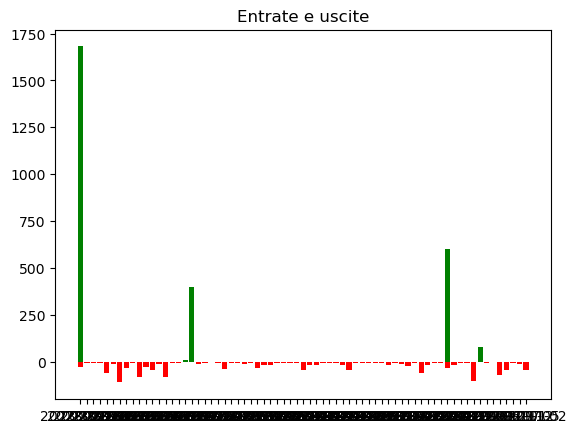

In [9]:
# Seleziona solo le righe con valori positivi o negativi
df = df.loc[df['Importo'] != 0]

# Crea un array di colori per le barre
colors = np.where(df['Importo'] > 0, 'g', 'r')

# Crea il grafico a barre
plt.bar(df['Data'], df['Importo'], color=colors)

# Imposta il titolo del grafico
plt.title('Entrate e uscite')

# Mostra il grafico
plt.show()


In [10]:
import plotly.graph_objs as go
import plotly.express as px

In [11]:
import pandas as pd

# Converti la colonna del tempo in formato datetime
df['Data'] = pd.to_datetime(df['Data'])

# Seleziona le righe con data successiva al 15 settembre 2023
df_after_15_sep_2023 = df.query('Data > "2023-09-15"')

# Stampa il dataframe risultante
print(df_after_15_sep_2023)


        Data                                Operazione  \
0 2023-10-13        Pagamento Effettuato Su Pos Estero   
1 2023-10-13                      Stipendio O Pensione   
2 2023-10-12                             Pagamento Pos   
3 2023-10-12                             Pagamento Pos   
4 2023-09-30  Canone Mensile Base E Servizi Aggiuntivi   

                                            Dettagli        Conto o carta  \
0         Apple.com/bill Itunes.com 13/10/2023 18.51  Conto 1000/00071615   
1  COD. DISP. 0123101219839164 SALA 00908454 STIP...  Conto 1000/00071615   
2                Lidl 2552 Pinerolo 12/10/2023 18.21  Conto 1000/00071615   
3               Iliad Italia Milano 12/10/2023 02.52  Conto 1000/00071615   
4                   Canone Mensile Mese Di Settembre  Conto 1000/00071615   

    Contabilizzazione                    Categoria  Valuta  Importo  
0  NON CONTABILIZZATO                  Altre uscite    EUR   -26.49  
1      CONTABILIZZATO           Stipendi e pensi

In [12]:
df=df_after_15_sep_2023

In [13]:
import plotly.graph_objs as go
import plotly.express as px

colors = {'positive': '#00FF00', 'negative': '#FF0000'}
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Data'],
    y=df['Importo'],
    marker_color=df['Importo'].apply(lambda x: colors['positive'] if x >= 0 else colors['negative'])
))

fig.show()


In [111]:
# Seleziona le righe con importi negativi
df_negative = df[df['Importo'] < 0]

# Seleziona le righe con importi positivi
df_positive = df[df['Importo'] > 0]

# Calcola la somma degli importi negativi e positivi
sum_negative = df_negative['Importo'].sum()
sum_positive = df_positive['Importo'].sum()

# Crea il bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=['Uscite', 'Entrate'], y=[-sum_negative, sum_positive], marker_color=['red', 'green']))

# Aggiungi il titolo al grafico
fig.update_layout(title='Confronto tra entrate e uscite')

# Mostra il grafico
fig.show()


In [102]:
# Seleziona le righe con importi negativi
df_negative = df[df['Importo'] < 0]

df_positive = df[df['Importo'] > 0]

In [107]:
# Crea il pie chart
fig = px.pie(df_positive, values=abs(df_positive["Importo"]), names=df_positive["Categoria "])

# Aggiungi il titolo al grafico
fig.update_layout(title='Income')

# Mostra il grafico
fig.show()

In [105]:

# Crea il pie chart
fig = px.pie(df_negative, values=abs(df_negative["Importo"]), names=df_negative["Categoria "])

# Aggiungi il titolo al grafico
fig.update_layout(title='Outcome')

# Mostra il grafico
fig.show()


# Provo a fare l'auto categorizzazione delle righe del datagframe

Idea di suddivisione:

* **Housing**
  * Mortgage or rent
  * Property taxes
  * Household repairs
  * Condominium fees
  * Home insurance

* **Transportation**
  * Car payment
  * Car warranty
  * Fuel
  * Tires
  * Maintenance and oil changes
  * Parking fees
  * Car repairs
  * Registration and DMV taxes
  * Car insurance
  * Public transportation (bus, train, metro, etc.)
  * Tolls and Telepass

* **Food**
  * Grocery shopping
  * Restaurants
  * Pet food

* **Utilities**
  * Electricity
  * Water
  * Waste
  * Telephony
  * Cable TV
  * Internet

* **Clothing**
  * Adult clothing
  * Adult shoes
  * Children's clothing
  * Children's shoes

* **Healthcare**
  * Primary care
  * Dental care
  * Specialty care (dermatologists, orthodontists, optometrists, etc.)
  * Urgent care
  * Medications
  * Medical devices
  * Health insurance

* **Household Items/Supplies**
  * Toiletries
  * Laundry detergent
  * Dishwasher detergent
  * Cleaning supplies
  * Tools

* **Personal**
  * Gym memberships
  * Haircuts
  * Salon services
  * Cosmetics (like makeup or services like laser hair removal)
  * Babysitter
  * Subscriptions (magazines, online services, etc.)

* **Debt**
  * Personal loans
  * Student loans
  * Credit cards

* **Retirement**
  * Financial planning
  * Investments

* **Education**
  * Children's college
  * Your college
  * School supplies
  * Books

* **Savings**
  * Emergency fund
  * Big purchases like a new mattress or laptop
  * Other savings

* **Gifts/Donations**
  * Birthdays
  * Anniversaries
  * Weddings
  * Christmas
  * Special occasions
  * Charities

* **Entertainment**
  * Alcohol and/or bars
  * Games
  * Movies
  * Concerts
  * Vacations
  * Subscriptions (Netflix, Amazon, Hulu, etc.)



* **Abitazione**
  * Mutuo o affitto
  * Tasse sulla proprietà
  * Riparazioni domestiche
  * Spese condominiali
  * Assicurazione casa

* **Trasporti**
  * Pagamento dell'auto
  * Garanzia auto
  * Carburante
  * Pneumatici
  * Manutenzione e cambio olio
  * Tariffe di parcheggio
  * Riparazioni auto
  * Tasse di registrazione e DMV
  * Assicurazione auto
  * Trasporto pubblico (bus, treno, metro, ecc.)
  * Pedaggi e Telepass

* **Alimentazione**
  * Spesa alimentare
  * Ristoranti
  * Cibo per animali domestici

* **Utenze**
  * Elettricità
  * Acqua
  * Rifiuti
  * Telefonia
  * TV via cavo
  * Internet
  * Banca

* **Abbigliamento**
  * Abbigliamento per adulti
  * Scarpe per adulti
  * Abbigliamento per bambini
  * Scarpe per bambini

* **Sanità**
  * Assistenza primaria
  * Assistenza dentale
  * Assistenza specialistica (dermatologi, ortodontisti, oculisti, ecc.)
  * Assistenza urgente
  * Farmaci
  * Dispositivi medici
  * Assicurazione sanitaria

* **Articoli e forniture per la casa**
  * Articoli da toeletta
  * Detersivo per il bucato
  * Detersivo per lavastoviglie
  * Prodotti per la pulizia
  * Utensili

* **Personale**
  * Abbonamenti palestra
  * Tagli di capelli
  * Servizi di salone
  * Cosmetici (come trucco o servizi come la depilazione laser)
  * Baby sitter
  * Abbonamenti (riviste, servizi online, ecc.)

* **Debiti**
  * Prestiti personali
  * Prestiti studenteschi
  * Carte di debito

* Pagementi esterni
  * PayPal
  * Satispay

* **Pensionamento**
  * Pianificazione finanziaria
  * Investimenti

* **Istruzione**
  * College dei figli
  * Tuo college
  * Forniture scolastiche
  * Libri

* **Risparmi**
  * Fondo di emergenza
  * Grandi acquisti come un nuovo materasso o laptop
  * Altri risparmi

* **Regali/Donazioni**
  * Compleanni
  * Anniversari
  * Matrimoni
  * Natale
  * Occasioni speciali
  * Beneficenza

* **Intrattenimento**
  * Alcol e/o bar
  * Giochi
  * Cinema
  * Concerti
  * Vacanze
  * Abbonamenti (Netflix, Amazon, Hulu, ecc.)

* **Stipendi e pensioni**
  * Stipendio
  * Pensione
  * Investimento
  * Entrate varie


In [20]:
import pandas as pd  # Carica il file CSV in un DataFrame di Pandas

df = pd.read_csv("../data/dataframe.csv")
df.head()

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento
0,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN
1,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendi e pensioni,Stipendio,NaN
2,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,Alimentazione,Spesa alimentare,NaN
3,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN
4,2023-09-30T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,NaN,NaN,NaN


In [21]:
df["Descrizione"] = (
    df["Operazione"] + " - " + df["Dettagli"] + " - " + df["Categoria banca"]
)
df.head()

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione
0,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN,Pagamento Effettuato Su Pos Estero - Apple.com...
1,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendi e pensioni,Stipendio,NaN,Stipendio O Pensione - COD. DISP. 012310121983...
2,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,Alimentazione,Spesa alimentare,NaN,Pagamento Pos - Lidl 2552 Pinerolo 12/10/2023 ...
3,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN,Pagamento Pos - Iliad Italia Milano 12/10/2023...
4,2023-09-30T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,NaN,NaN,NaN,Canone Mensile Base E Servizi Aggiuntivi - Can...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [22]:
print(df["Categoria"].isna().any())
print(df["Subcategoria"].isna().any())

True
True


In [23]:
# Rimuovi le righe con categorie o sottocategorie NaN
df_training = df.dropna(subset=["Categoria", "Subcategoria"])
df_training.head()

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione
1,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendi e pensioni,Stipendio,NaN,Stipendio O Pensione - COD. DISP. 012310121983...
2,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,Alimentazione,Spesa alimentare,NaN,Pagamento Pos - Lidl 2552 Pinerolo 12/10/2023 ...
5,2023-09-12T00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/09/2023 ALLE ORE 0349 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,Utenze,Telefonia,NaN,ILIAD ITALIA Roma - EFFETTUATO IL 12/09/2023 A...
7,2023-08-31T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Agosto,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,Utenze,Banca,NaN,Canone Mensile Base E Servizi Aggiuntivi - Can...
9,2023-08-29T00:00:00,Supermercato Md Trinita' D'ag,Effettuato Il 29/08/2023 Alle Ore 1937 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Generi alimentari e supermercato,EUR,-110.09,Alimentazione,Spesa alimentare,NaN,Supermercato Md Trinita' D'ag - Effettuato Il ...


In [24]:
# Seleziona le righe con categoria e/o sottocategoria NaN
df_nan = df[df["Categoria"].isna() | df["Subcategoria"].isna()]
df_nan.head()

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione
0,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN,Pagamento Effettuato Su Pos Estero - Apple.com...
3,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN,Pagamento Pos - Iliad Italia Milano 12/10/2023...
4,2023-09-30T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,NaN,NaN,NaN,Canone Mensile Base E Servizi Aggiuntivi - Can...
6,2023-08-31T00:00:00,GAMPI SRL Badesi,EFFETTUATO IL 31/08/2023 ALLE ORE 0935 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Carburanti,EUR,-60.50,NaN,NaN,NaN,GAMPI SRL Badesi - EFFETTUATO IL 31/08/2023 AL...
8,2023-08-30T00:00:00,P.le Della Pace Lato Via Asfod Alghero,Effettuato Il 30/08/2023 Alle Ore 1823 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-10.50,NaN,NaN,NaN,P.le Della Pace Lato Via Asfod Alghero - Effet...


In [25]:
# Combina la categoria e la sottocategoria in una sola etichetta
df_training["Etichetta"] = (
    df_training["Categoria"] + " - " + df_training["Subcategoria"]
)

df_training.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23936\3775628726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training["Etichetta"] = (


,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione,Etichetta
1,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendi e pensioni,Stipendio,NaN,Stipendio O Pensione - COD. DISP. 012310121983...,Stipendi e pensioni - Stipendio
2,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,Alimentazione,Spesa alimentare,NaN,Pagamento Pos - Lidl 2552 Pinerolo 12/10/2023 ...,Alimentazione - Spesa alimentare
5,2023-09-12T00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/09/2023 ALLE ORE 0349 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,Utenze,Telefonia,NaN,ILIAD ITALIA Roma - EFFETTUATO IL 12/09/2023 A...,Utenze - Telefonia
7,2023-08-31T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Agosto,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,Utenze,Banca,NaN,Canone Mensile Base E Servizi Aggiuntivi - Can...,Utenze - Banca
9,2023-08-29T00:00:00,Supermercato Md Trinita' D'ag,Effettuato Il 29/08/2023 Alle Ore 1937 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Generi alimentari e supermercato,EUR,-110.09,Alimentazione,Spesa alimentare,NaN,Supermercato Md Trinita' D'ag - Effettuato Il ...,Alimentazione - Spesa alimentare


In [31]:
# Esempio di dati di addestramento
transazioni = df_training["Descrizione"].tolist()
categorie = df_training["Etichetta"].tolist()

In [32]:
# Trasformiamo le categorie in numeri
encoder = LabelEncoder()
y = encoder.fit_transform(categorie)

In [33]:
# Creiamo una matrice di conteggio delle parole
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(transazioni)

In [34]:
# Addestriamo il modello
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [35]:
# Ora possiamo categorizzare nuove transazioni
# Prepara le transazioni per la previsione
nuove_transazioni = df_nan["Dettagli"].tolist()
X_nuovo = vectorizer.transform(nuove_transazioni)
predizioni = model.predict(X_nuovo)

In [36]:
# Trasforma le predizioni numeriche in etichette di categoria e sottocategoria
categorie_predette = encoder.inverse_transform(predizioni)

# Ora hai le categorie predette per le tue nuove transazioni
print(categorie_predette)

['Alimentazione - Spesa alimentare' 'Utenze - Telefonia' 'Utenze - Banca'
 'Trasporti - Trasporto pubblico' 'Trasporti - Trasporto pubblico'
 'Trasporti - Trasporto pubblico' 'Alimentazione - Spesa alimentare'
 'Trasporti - Trasporto pubblico' 'Alimentazione - Spesa alimentare'
 'Alimentazione - Spesa alimentare' 'Alimentazione - Spesa alimentare'
 'Alimentazione - Spesa alimentare' 'Trasporti - Trasporto pubblico'
 'Stipendi e pensioni - Credito' 'Pagamenti esterni - Entrate varie'
 'Trasporti - Trasporto pubblico' 'Utenze - Banca'
 'Trasporti - Trasporto pubblico' 'Trasporti - Trasporto pubblico'
 'Trasporti - Trasporto pubblico' 'Utenze - Banca'
 'Trasporti - Trasporto pubblico' 'Trasporti - Trasporto pubblico'
 'Trasporti - Trasporto pubblico' 'Trasporti - Trasporto pubblico'
 'Trasporti - Trasporto pubblico' 'Trasporti - Trasporto pubblico'
 'Trasporti - Trasporto pubblico' 'Trasporti - Trasporto pubblico'
 'Utenze - Banca' 'Trasporti - Trasporto pubblico'
 'Trasporti - Trasporto 

In [37]:
# Aggiungi le categorie predette al dataframe
df_nan["Etichetta_predetta"] = categorie_predette

# Ora il tuo dataframe ha una nuova colonna 'Etichetta_predetta' con le categorie predette
df_nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_23936\2317420347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["Etichetta_predetta"] = categorie_predette


,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione,Etichetta_predetta
0,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN,Pagamento Effettuato Su Pos Estero - Apple.com...,Alimentazione - Spesa alimentare
3,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN,Pagamento Pos - Iliad Italia Milano 12/10/2023...,Utenze - Telefonia
4,2023-09-30T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,NaN,NaN,NaN,Canone Mensile Base E Servizi Aggiuntivi - Can...,Utenze - Banca
6,2023-08-31T00:00:00,GAMPI SRL Badesi,EFFETTUATO IL 31/08/2023 ALLE ORE 0935 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Carburanti,EUR,-60.50,NaN,NaN,NaN,GAMPI SRL Badesi - EFFETTUATO IL 31/08/2023 AL...,Trasporti - Trasporto pubblico
8,2023-08-30T00:00:00,P.le Della Pace Lato Via Asfod Alghero,Effettuato Il 30/08/2023 Alle Ore 1823 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-10.50,NaN,NaN,NaN,P.le Della Pace Lato Via Asfod Alghero - Effet...,Trasporti - Trasporto pubblico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-01-10T00:00:00,Addebito Diretto Disposto A Favore Di Matteo G...,COD. DISP.0123010901479277 NOMEmatteo Griot MA...,Conto 1000/00071615,CONTABILIZZATO,Domiciliazioni e Utenze,EUR,-8.50,NaN,NaN,NaN,Addebito Diretto Disposto A Favore Di Matteo G...,Pagamenti esterni - Satispay
94,2023-01-10T00:00:00,Commissioni E Spese Adue,COD. DISP.0123010901479277 NOMEmatteo Griot MA...,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-0.80,NaN,NaN,NaN,Commissioni E Spese Adue - COD. DISP.012301090...,Pagamenti esterni - Satispay
95,2023-01-09T00:00:00,Trenit S721130bstazione,Pagamento Su POS TRENIT S721130BSTAZIONE 09/01...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-102.00,NaN,NaN,NaN,Trenit S721130bstazione - Pagamento Su POS TRE...,Trasporti - Trasporto pubblico
97,2022-12-12T00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/12/2022 ALLE ORE 0223 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,NaN,NaN,NaN,ILIAD ITALIA Roma - EFFETTUATO IL 12/12/2022 A...,Trasporti - Trasporto pubblico


In [41]:
# Unisci i dataframe di addestramento e di previsione
df_completo = pd.concat([df, df_nan])

# Ora df_completo contiene sia i dati di addestramento che i risultati delle previsioni
df_completo.head()

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione,Etichetta_predetta
0,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN,Pagamento Effettuato Su Pos Estero - Apple.com...,NaN
1,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendi e pensioni,Stipendio,NaN,Stipendio O Pensione - COD. DISP. 012310121983...,NaN
2,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,Alimentazione,Spesa alimentare,NaN,Pagamento Pos - Lidl 2552 Pinerolo 12/10/2023 ...,NaN
3,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN,Pagamento Pos - Iliad Italia Milano 12/10/2023...,NaN
4,2023-09-30T00:00:00,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,NaN,NaN,NaN,Canone Mensile Base E Servizi Aggiuntivi - Can...,NaN


In [40]:
# Salva il dataframe in un file CSV
df_completo.to_csv("../data/dataframev2.csv", index=False)

## codice compatto

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/dataframe.csv")
df["Descrizione"] = (
    df["Operazione"] + " - " + df["Dettagli"] + " - " + df["Categoria banca"]
)
df_training = df.dropna(subset=["Categoria", "Subcategoria"])
df_nan = df[df["Categoria"].isna() | df["Subcategoria"].isna()]
df_training["Etichetta"] = (
    df_training["Categoria"] + " - " + df_training["Subcategoria"]
)
transazioni = df_training["Descrizione"].tolist()
categorie = df_training["Etichetta"].tolist()

encoder = LabelEncoder()
y = encoder.fit_transform(categorie)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(transazioni)

model = MultinomialNB()
model.fit(X, y)

nuove_transazioni = df_nan["Dettagli"].tolist()
X_nuovo = vectorizer.transform(nuove_transazioni)

probabilita_predizioni = model.predict_proba(X_nuovo)
soglia_confidenza = 0.7
categorie_predette = []

for probabilita in probabilita_predizioni:
    if max(probabilita) > soglia_confidenza:
        categorie_predette.append(encoder.inverse_transform([probabilita.argmax()])[0])
    else:
        categorie_predette.append(np.nan)

df_nan["Etichetta_predetta"] = categorie_predette

df_completo = pd.concat([df.reset_index(drop=True), df_nan.reset_index(drop=True)])

df_completo["Etichetta_predetta"] = df_completo["Etichetta_predetta"].replace(
    np.nan, "", regex=True
)
df_completo[["Categoria_temp", "Subcategoria_temp"]] = df_completo[
    "Etichetta_predetta"
].str.split(" - ", expand=True)

df_completo["Categoria"] = df_completo["Categoria"].where(
    df_completo["Etichetta_predetta"] == "", df_completo["Categoria_temp"]
)
df_completo["Subcategoria"] = df_completo["Subcategoria"].where(
    df_completo["Etichetta_predetta"] == "", df_completo["Subcategoria_temp"]
)

df_completo = df_completo.drop(["Categoria_temp", "Subcategoria_temp"], axis=1)
# Supponendo che 'Data' sia la colonna che contiene le date
df_completo = df_completo.sort_values("Data")
# Resetta l'indice del DataFrame
df_completo = df_completo.reset_index(drop=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_23936\2295175777.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training["Etichetta"] = (
C:\Users\Admin\AppData\Local\Temp\ipykernel_23936\2295175777.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["Etichetta_predetta"] = categorie_predette


In [50]:
df_completo

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,Descrizione,Etichetta_predetta
0,2022-11-02T00:00:00,Trenit S721130bstazione Pinerolo,Effettuato Il 02/11/2022 Alle Ore 0740 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,Trasporti,Trasporto pubblico,NaN,Trenit S721130bstazione Pinerolo - Effettuato ...,
1,2022-11-05T00:00:00,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14.00,Alimentazione,Ristorante,NaN,Lappetito Corso Torino 48 P - LAPPETITO CORSO ...,
2,2022-11-12T00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,Trasporti,Trasporto pubblico,NaN,ILIAD ITALIA Roma - EFFETTUATO IL 12/11/2022 A...,Trasporti - Trasporto pubblico
3,2022-11-12T00:00:00,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,NaN,NaN,NaN,ILIAD ITALIA Roma - EFFETTUATO IL 12/11/2022 A...,
4,2022-12-01T00:00:00,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,Trasporti,Trasporto pubblico,NaN,Trenit S721130bstazione Pinerolo - Effettuato ...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2023-10-12T00:00:00,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN,Pagamento Pos - Iliad Italia Milano 12/10/2023...,
175,2023-10-12T00:00:00,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,Alimentazione,Spesa alimentare,NaN,Pagamento Pos - Lidl 2552 Pinerolo 12/10/2023 ...,
176,2023-10-13T00:00:00,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN,Pagamento Effettuato Su Pos Estero - Apple.com...,
177,2023-10-13T00:00:00,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,Stipendi e pensioni,Stipendio,NaN,Stipendio O Pensione - COD. DISP. 012310121983...,


# Importare e tenere aggiornata la lista dei movimenti bancari

In [19]:
import pandas as pd

In [20]:
file_path = "../data/lista_completa_15112023.xlsx"
dataframe = "../data/dataframe.csv"

In [21]:

def process_data(file_path):
    # Carica il file xlsx in un DataFrame
    df = pd.read_excel(file_path)
    # Rimuovi le prime righe fino alla prima cella vuota nella prima colonna
    df = df[df.iloc[:, 0].notna()]
    # Imposta la prima riga come nuova intestazione
    new_header = df.iloc[0]
    # Rimuovi la prima riga dal DataFrame
    df = df[1:]
    # Rinomina gli indici del DataFrame con i valori della nuova intestazione
    df = df.rename(columns=new_header)
    # Resetta gli indici del DataFrame
    df = df.reset_index(drop=True)
    # Converte la colonna "Data" in formato datetime
    df["Data"] = pd.to_datetime(df["Data"])
    # Rinomina la colonna 'Categoria' in 'Categoria banca'
    df = df.rename(columns={"Categoria ": "Categoria banca"})
    # Aggiungi le nuove colonne 'Categoria' e 'Subcategoria'
    df["Categoria"] = None
    df["Subcategoria"] = None
    df["Commento"] = None

    return df

In [22]:
new_data = process_data(file_path)
new_data.head()

,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento
0,2023-11-14,Lco,Pagamento Su POS LCO 14/111746 Carta N.5167 XX...,Conto 1000/00071615,CONTABILIZZATO,Carburanti,EUR,-40.08,None,None,None
1,2023-11-14,Addebito Diretto Disposto A Favore Di Matteo G...,COD. DISP.0123111352382608 NOMEmatteo Griot MA...,Conto 1000/00071615,CONTABILIZZATO,Domiciliazioni e Utenze,EUR,-14.3,None,None,None
2,2023-11-14,Commissioni E Spese Adue,COD. DISP.0123111352382608 NOMEmatteo Griot MA...,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-0.8,None,None,None
3,2023-11-14,Stipendio O Pensione,COD. DISP. 0123111353834605 SALA 00916427 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1895.44,None,None,None
4,2023-11-12,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2023 ALLE ORE 0253 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,None,None,None


In [26]:
def merge_and_sort(df1, df2, columns):
    # Unisci i due DataFrame
    df = pd.concat([df1, df2], keys=["df1", "df2"])

    # Converte la colonna "Data" in formato datetime
    df["Data"] = pd.to_datetime(df["Data"], errors="coerce")

    # Verifica se ci sono valori non validi nella colonna "Data"
    if df["Data"].isnull().any():
        print(
            "Attenzione: ci sono valori non validi nella colonna 'Data' che non possono essere convertiti in datetime."
        )
        return df

    # Rimuovi i duplicati basandoti su specifiche colonne, mantenendo la prima occorrenza (quella da df1)
    df = df.loc[~df.duplicated(subset=columns, keep="first")]

    # Ordina il DataFrame in base alla colonna "Data"
    df = df.sort_values("Data")

    # Resetta l'indice
    df = df.reset_index(drop=True)

    return df

In [24]:
pd.read_csv(dataframe).head()

,Unnamed: 0,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento
0,0,2023-10-13,Pagamento Effettuato Su Pos Estero,Apple.com/bill Itunes.com 13/10/2023 18.51,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-26.49,NaN,NaN,NaN
1,1,2023-10-13,Stipendio O Pensione,COD. DISP. 0123101219839164 SALA 00908454 STIP...,Conto 1000/00071615,CONTABILIZZATO,Stipendi e pensioni,EUR,1680.92,NaN,NaN,NaN
2,2,2023-10-12,Pagamento Pos,Lidl 2552 Pinerolo 12/10/2023 18.21,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-4.77,NaN,NaN,NaN
3,3,2023-10-12,Pagamento Pos,Iliad Italia Milano 12/10/2023 02.52,Conto 1000/00071615,NON CONTABILIZZATO,Altre uscite,EUR,-5.99,NaN,NaN,NaN
4,4,2023-09-30,Canone Mensile Base E Servizi Aggiuntivi,Canone Mensile Mese Di Settembre,Conto 1000/00071615,CONTABILIZZATO,"Imposte, bolli e commissioni",EUR,-5.50,NaN,NaN,NaN


In [27]:
df_final = merge_and_sort(df1=pd.read_csv(dataframe), df2=new_data, columns=["Data","Operazione","Dettagli","Conto o carta","Contabilizzazione","Categoria banca","Valuta","Importo"])
df_final.head()

,Unnamed: 0,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento
0,103.0,2022-11-02,Trenit S721130bstazione Pinerolo,Effettuato Il 02/11/2022 Alle Ore 0740 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.0,NaN,NaN,NaN
1,102.0,2022-11-05,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14.0,NaN,NaN,NaN
2,101.0,2022-11-12,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,NaN,NaN,NaN
3,100.0,2022-12-01,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.0,NaN,NaN,NaN
4,99.0,2022-12-07,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.4,NaN,NaN,NaN


In [26]:
df_final.to_csv("../data/dataframe.csv", index=False)

In [28]:
import datetime

today = datetime.datetime.now()
df_final.to_csv(
    f'C:/Users/Admin/Documents/GitHub/Banca/data/dataframe_{today.strftime("%Y%m%d_%H%M%S")}.csv',
    index=False,
)

# Dash

In [35]:
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset

In [37]:
df = pd.read_csv(
    "C:/Users/Admin/Documents/GitHub/MoneyMinder/data/dataframe_20231202_194450.csv"
)
df.head(1)

,Unnamed: 0,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento
0,103.0,2022-11-02,Trenit S721130bstazione Pinerolo,Effettuato Il 02/11/2022 Alle Ore 0740 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.0,NaN,NaN,NaN


In [38]:
data=df["Data"]
data.head()

0    2022-11-02
1    2022-11-05
2    2022-11-12
3    2022-12-01
4    2022-12-07
Name: Data, dtype: object

In [39]:
# Converti la colonna 'Data' in datetime
df["Data"] = pd.to_datetime(df["Data"])

# Converti in UTC
df["Data_time"] = df["Data"].dt.tz_localize("UTC")

df["Data_time"].head()

0   2022-11-02 00:00:00+00:00
1   2022-11-05 00:00:00+00:00
2   2022-11-12 00:00:00+00:00
3   2022-12-01 00:00:00+00:00
4   2022-12-07 00:00:00+00:00
Name: Data_time, dtype: datetime64[ns, UTC]

In [42]:
# Trova la data più grande
df["Data"].max()

Timestamp('2023-11-14 00:00:00')

In [40]:
# Trova la data più grande
data_max = df["Data"].max()

# Crea un array con le 30 date successive
date_range = pd.date_range(start=data_max, periods=31, freq=DateOffset(days=1))

# Converti l'array in UTC
date_range = date_range.tz_localize("UTC")

# Stampa l'array
print(date_range)

DatetimeIndex(['2023-11-14 00:00:00+00:00', '2023-11-15 00:00:00+00:00',
               '2023-11-16 00:00:00+00:00', '2023-11-17 00:00:00+00:00',
               '2023-11-18 00:00:00+00:00', '2023-11-19 00:00:00+00:00',
               '2023-11-20 00:00:00+00:00', '2023-11-21 00:00:00+00:00',
               '2023-11-22 00:00:00+00:00', '2023-11-23 00:00:00+00:00',
               '2023-11-24 00:00:00+00:00', '2023-11-25 00:00:00+00:00',
               '2023-11-26 00:00:00+00:00', '2023-11-27 00:00:00+00:00',
               '2023-11-28 00:00:00+00:00', '2023-11-29 00:00:00+00:00',
               '2023-11-30 00:00:00+00:00', '2023-12-01 00:00:00+00:00',
               '2023-12-02 00:00:00+00:00', '2023-12-03 00:00:00+00:00',
               '2023-12-04 00:00:00+00:00', '2023-12-05 00:00:00+00:00',
               '2023-12-06 00:00:00+00:00', '2023-12-07 00:00:00+00:00',
               '2023-12-08 00:00:00+00:00', '2023-12-09 00:00:00+00:00',
               '2023-12-10 00:00:00+00:00', '2023-1

In [ ]:
# forecaste il saldo del conto dopo ogni transaz
# Converte la colonna "Data" in timestamp
df["Day"] = df["Data"].apply(lambda x: x.timestamp())

X = df["Day"].values.reshape(-1, 1)
y = df["Balance"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # addestramento del modello

# previsione
x_pred = date_for_forecast(date=df["Data"])
x_pred = pd.Series(x_pred)
# Converti gli oggetti Timestamp in giorni dall'epoca
x_pred = x_pred.apply(
    lambda x: (x - pd.Timestamp("1970-01-01").tz_localize("UTC")) // pd.Timedelta("1D")
)
# Trasforma x_pred in un array numpy per l'uso con il tuo modello
x_pred = np.array(x_pred).reshape(-1, 1)
# Fai previsioni sul saldo del conto per i prossimi 30 giorni
y_pred = regressor.predict(x_pred)